In [1]:
import os

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, TargetEncoder, LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import gc


In [2]:
df = pd.read_pickle('data/data_all.pkl')

# df = df.sample(frac=0.1)
gc.collect()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 421 entries, flag to pre_loans530_17
dtypes: category(1), uint8(420)
memory usage: 1.2 GB


In [3]:
target_distribution = df['flag'].value_counts(normalize=True) * 100
print(target_distribution)

flag
0    96.451933
1     3.548067
Name: proportion, dtype: float64


In [4]:
df.isna().sum().sum()

0

In [5]:
df.head()

,flag,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,pre_loans3060_3,pre_loans90_3,pre_loans3060_4,pre_loans3060_6,pre_loans6090_0,pre_loans5_10,pre_loans530_5,pre_loans530_8,pre_loans530_9,pre_loans530_17
0,0,0,1,1,1,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,1,0,2,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(df.drop('flag', axis=1), df['flag'], test_size=0.25, random_state=321)

In [7]:
# Oversampling (SMOTE)
smote = SMOTE(sampling_strategy=0.2)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Создание DataFrame из oversampled-данных
resampled_df = pd.DataFrame(X_res, columns=X_train.columns)
resampled_df['flag'] = y_res  # Добавляем целевую переменную

# Создание DataFrame из тестовых данных
test_df = pd.DataFrame(X_test, columns=X_train.columns)
test_df['flag'] = y_test

# # Объединение oversampled-тренировочных и тестовых данных
# final_df = pd.concat([resampled_df, test_df], axis=0)

# # Проверка распределения
# print(final_df['flag'].value_counts(normalize=True) * 100)

resampled_df.to_pickle('data/train_resampled.pkl')  # Новый файл
test_df.to_pickle('data/test_resampled.pkl')  # Новый файл


/tmp/ipykernel_749006/1665349267.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['flag'] = y_res  # Добавляем целевую переменную


In [31]:
# 1. Загрузка данных
train_df = pd.read_pickle('data/train_resampled.pkl')
test_df = pd.read_pickle('data/test_resampled.pkl')

# 2. Проверка структуры данных
print("Колонки train:", train_df.columns.tolist())
print("Колонки test:", test_df.columns.tolist())

# 3. Разделение на признаки и целевую переменную
# Предполагаем, что целевая переменная называется 'flag'
X_train = train_df.drop('flag', axis=1)
y_train = train_df['flag']

X_test = test_df.drop('flag', axis=1)
y_test = test_df['flag']

# 4. Проверка размерностей
print(f"\nРазмеры данных:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# 5. Проверка распределения классов
print("\nРаспределение в train:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение в test:")
print(y_test.value_counts(normalize=True))

Колонки train: ['pre_since_opened_0', 'pre_since_opened_1', 'pre_since_opened_2', 'pre_since_opened_3', 'pre_since_opened_4', 'pre_since_opened_5', 'pre_since_opened_6', 'pre_since_opened_7', 'pre_since_opened_8', 'pre_since_opened_9', 'pre_since_opened_10', 'pre_since_opened_11', 'pre_since_opened_12', 'pre_since_opened_13', 'pre_since_opened_14', 'pre_since_opened_15', 'pre_since_opened_16', 'pre_since_opened_17', 'pre_since_opened_18', 'pre_since_opened_19', 'pre_since_confirmed_0', 'pre_since_confirmed_1', 'pre_since_confirmed_2', 'pre_since_confirmed_3', 'pre_since_confirmed_4', 'pre_since_confirmed_5', 'pre_since_confirmed_6', 'pre_since_confirmed_7', 'pre_since_confirmed_8', 'pre_since_confirmed_9', 'pre_since_confirmed_10', 'pre_since_confirmed_11', 'pre_since_confirmed_12', 'pre_since_confirmed_13', 'pre_since_confirmed_14', 'pre_since_confirmed_15', 'pre_since_confirmed_16', 'pre_since_confirmed_17', 'pre_pterm_0', 'pre_pterm_1', 'pre_pterm_2', 'pre_pterm_3', 'pre_pterm_4', '

In [32]:
from catboost import CatBoostClassifier, Pool

catboost_clf = CatBoostClassifier(
                                    auto_class_weights='Balanced',  # Автовзвешивание классов
                                    iterations=300,
                                    # learning_rate=0.03,
                                    task_type="GPU",
                                    eval_metric="AUC",
                                    early_stopping_rounds=20
                                    )

catboost_clf.fit(X_train, y_train,
                   eval_set=(X_test, y_test),
                   verbose=False,
                   plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


{'recall': 0.08944928191790116, 'precision': 0.16006745362563238, 'f1': 0.11476519804613822, 'roc_auc': 0.7472088732679087}


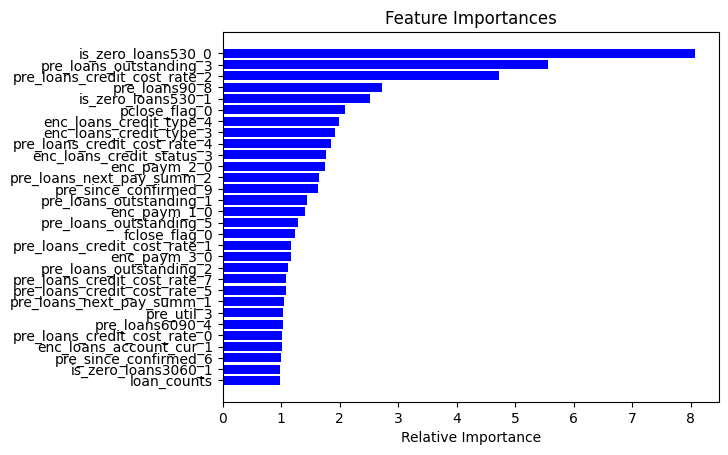

In [34]:
# Get predicted classes
y_pred = catboost_clf.predict(X_test)
# Get predicted probabilities for each class
y_pred_proba = catboost_clf.predict_proba(X_test)[:,1]

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
print(metrics)

feature_names = X_train.columns
importances_all = catboost_clf.feature_importances_
indices = np.argsort(importances_all)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_all[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


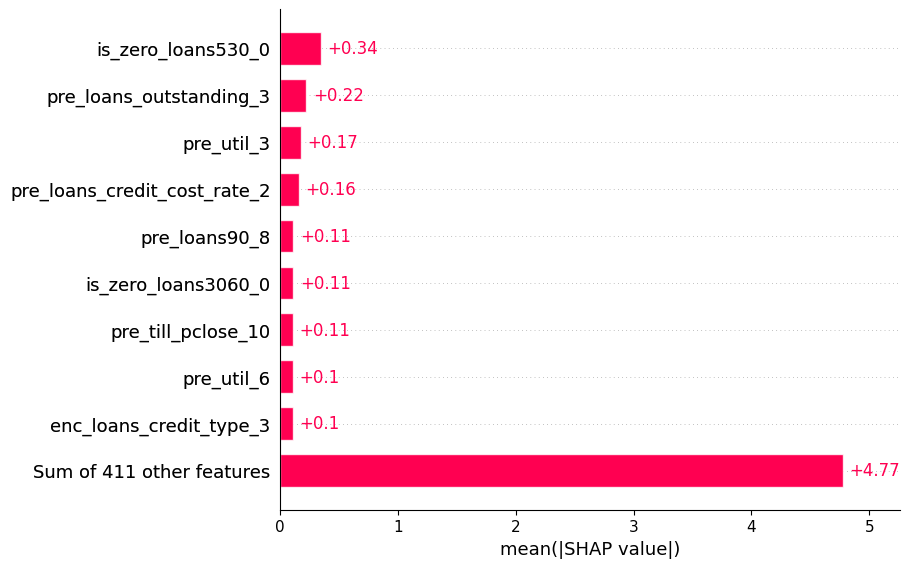

In [23]:
import shap
explainer = shap.Explainer(catboost_clf)
shap_values = explainer(X_test.sample(frac=0.5))
shap_importance = shap_values.abs.mean(0).values
shap.plots.bar(shap_values)


In [35]:
features = [feature_names[i] for i in np.argsort(importances_all)[-100:]]
# features.append("flag")


with open("feature_names.txt", "w") as output:
    output.write(str(features))

features


['pre_since_opened_12',
 'enc_paym_1_3',
 'enc_paym_8_0',
 'pre_since_opened_1',
 'enc_paym_0_0',
 'pre_maxover2limit_17',
 'enc_paym_19_0',
 'pre_loans3060_5',
 'pre_loans_credit_cost_rate_8',
 'pre_pterm_17',
 'pre_till_pclose_10',
 'enc_paym_15_0',
 'pre_util_8',
 'pre_util_4',
 'pre_since_opened_19',
 'enc_paym_0_1',
 'enc_paym_16_0',
 'pre_loans_credit_cost_rate_6',
 'enc_loans_account_holder_type_1',
 'is_zero_maxover2limit_0',
 'pre_loans_credit_cost_rate_13',
 'pre_util_5',
 'pre_loans_credit_limit_11',
 'pre_pterm_14',
 'pre_since_opened_9',
 'pre_util_16',
 'is_zero_maxover2limit_1',
 'pre_till_fclose_11',
 'enc_paym_1_1',
 'is_zero_loans3060_0',
 'enc_loans_credit_status_2',
 'pre_loans530_16',
 'pre_loans_credit_limit_7',
 'pre_util_18',
 'enc_paym_7_0',
 'pre_util_6',
 'pre_loans_credit_limit_6',
 'pre_loans_credit_limit_13',
 'pre_loans_credit_cost_rate_11',
 'pre_loans_next_pay_summ_6',
 'pre_since_confirmed_0',
 'pre_loans_next_pay_summ_5',
 'enc_loans_credit_type_0',
 

In [58]:
import ast

with open("feature_names.txt", "r") as f:
    features = ast.literal_eval(f.read())  # Безопасное преобразование строки в список

# Убедимся, что 'flag' есть в списке (целевая переменная)
if 'flag' not in features:
    features.append('flag')

# 1. Загрузка данных
train_df = pd.read_pickle('data/train_resampled.pkl')

test_df = pd.read_pickle('data/test_resampled.pkl')

# Фильтрация
features_X = [f for f in features if f != 'flag']
X_train = train_df.drop('flag', axis=1)
X_train = train_df[features_X]
y_train = train_df['flag']
X_test = test_df.drop('flag', axis=1)
X_test = test_df[features_X]
y_test = test_df['flag']

print("Фичи в X_train:", X_train.columns.tolist())
print("Фичи в X_test:", X_test.columns.tolist())
print("\nРазмеры данных после фильтрации:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Фичи в X_train: ['pre_since_opened_12', 'enc_paym_1_3', 'enc_paym_8_0', 'pre_since_opened_1', 'enc_paym_0_0', 'pre_maxover2limit_17', 'enc_paym_19_0', 'pre_loans3060_5', 'pre_loans_credit_cost_rate_8', 'pre_pterm_17', 'pre_till_pclose_10', 'enc_paym_15_0', 'pre_util_8', 'pre_util_4', 'pre_since_opened_19', 'enc_paym_0_1', 'enc_paym_16_0', 'pre_loans_credit_cost_rate_6', 'enc_loans_account_holder_type_1', 'is_zero_maxover2limit_0', 'pre_loans_credit_cost_rate_13', 'pre_util_5', 'pre_loans_credit_limit_11', 'pre_pterm_14', 'pre_since_opened_9', 'pre_util_16', 'is_zero_maxover2limit_1', 'pre_till_fclose_11', 'enc_paym_1_1', 'is_zero_loans3060_0', 'enc_loans_credit_status_2', 'pre_loans530_16', 'pre_loans_credit_limit_7', 'pre_util_18', 'enc_paym_7_0', 'pre_util_6', 'pre_loans_credit_limit_6', 'pre_loans_credit_limit_13', 'pre_loans_credit_cost_rate_11', 'pre_loans_next_pay_summ_6', 'pre_since_confirmed_0', 'pre_loans_next_pay_summ_5', 'enc_loans_credit_type_0', 'pre_loans_credit_limit_2',

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.calibration import CalibratedClassifierCV
from catboost import CatBoost, Pool
from catboost.widget import MetricVisualizer  # or similar

# catboost_clf_2 = CatBoostClassifier(iterations=500,
#                                     learning_rate=0.005,
#                                     task_type="GPU",
#                                     early_stopping_rounds=20
#                                     )

# catboost_clf_2.fit(X_train, y_train,
#                    eval_set=(X_test, y_test),
#                    verbose=False,
#                    plot=True,
# )

catboost_clf_2 = CatBoostClassifier(
    iterations=50000,
    loss_function='Logloss',
    learning_rate=0.01,          # Увеличенный LR для более быстрого обучения
    # scale_pos_weight=7,          # Оптимальный вес между 6-8 для вашего случая
    auto_class_weights='Balanced', # Альтернатива
    eval_metric='PRAUC',        # Лучше AUC-ROC для дисбалансированных данных
    early_stopping_rounds=300,   # Увеличенный patience для стабильности
    task_type="GPU",
    l2_leaf_reg=1,              # Более сильная регуляризация
    depth=5,                    # Оптимальная глубина
    min_data_in_leaf=50,        # Увеличенный размер листа
    grow_policy='Lossguide',
    bootstrap_type='Bayesian',   # Лучше для дисбаланса
    random_strength=1,          # Улучшает разнообразие деревьев
    verbose=50,                # Логирование каждые 50 итераций
    od_type='Iter',             # Ранняя остановка по итерациям
    # od_wait=50,                 # Ожидание перед остановкой
    metric_period=50,
    use_best_model=True         # Использовать лучшую итерацию
)


catboost_clf_2.fit(X_train, y_train,
                   eval_set=(X_test, y_test),
                   verbose=False,
                   plot=True,

)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric PRAUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


In [ ]:
catboost_clf_2.save_model('model.cbm', pool=X_train)

{'recall': 0.08567982208149572, 'precision': 0.16541736409286079, 'f1': 0.11288800595977154, 'roc_auc': 0.7510721979796303}


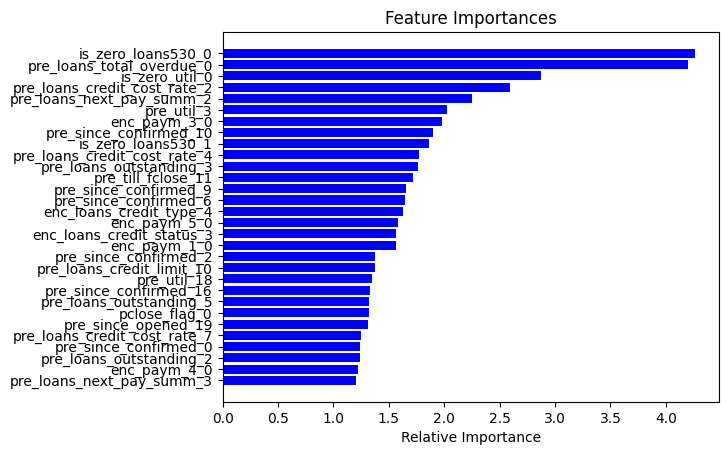

In [52]:
# Get predicted classes
y_pred = catboost_clf_2.predict(X_test)
# Get predicted probabilities for each class
y_pred_proba = catboost_clf_2.predict_proba(X_test)[:,1]

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
print(metrics)

feature_names = X_train.columns
importances = catboost_clf_2.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

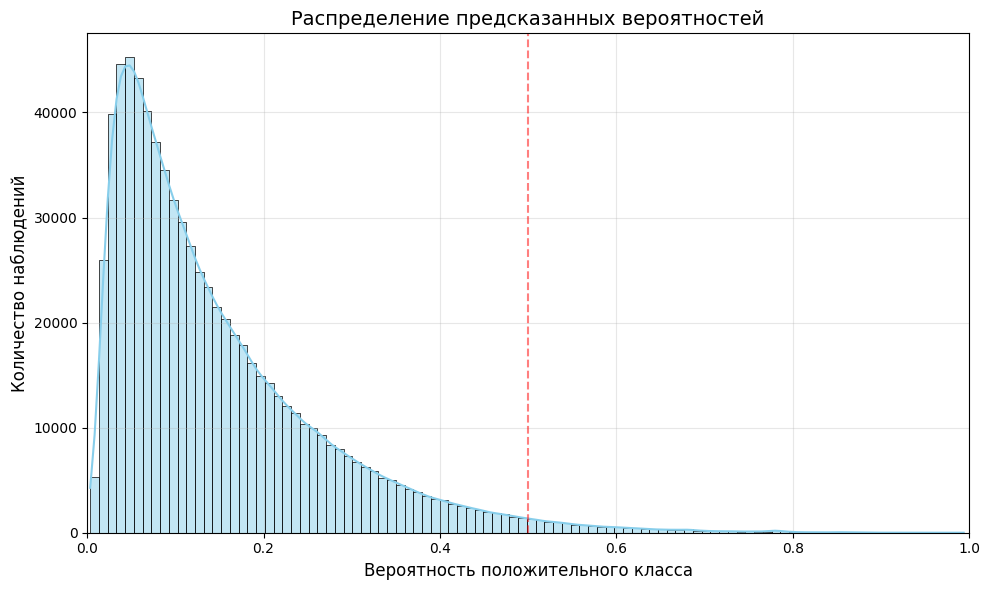

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Получаем вероятности для положительного класса
y_pred_proba = catboost_clf_2.predict_proba(X_test)[:, 1]

# Создаем график
plt.figure(figsize=(10, 6))

# Гистограмма распределения
sns.histplot(y_pred_proba, bins=100, kde=True, color='skyblue')

# Настройки графика
plt.title('Распределение предсказанных вероятностей', fontsize=14)
plt.xlabel('Вероятность положительного класса', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.xlim(0, 1)  # Ограничиваем диапазон от 0 до 1

# Добавляем вертикальную линию по порогу 0.5 (если нужно)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

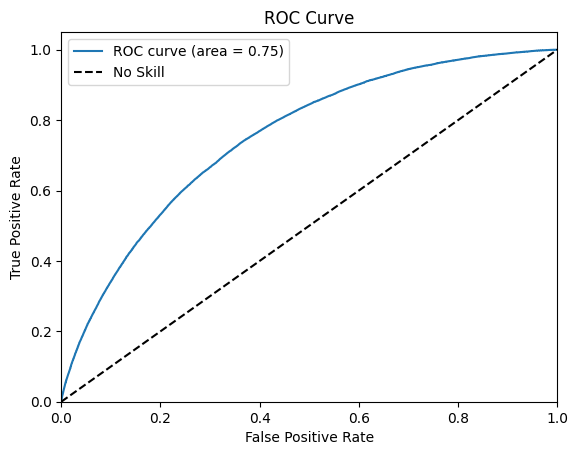

In [54]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

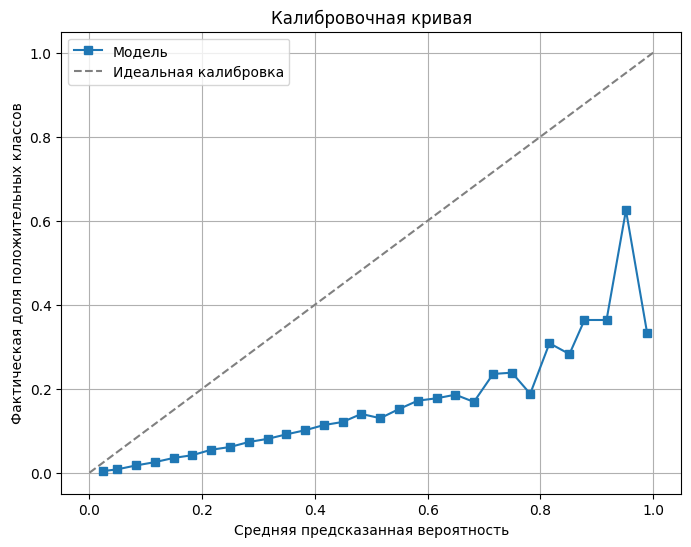

In [55]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Получаем калибровочные кривые
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=30)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Модель')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Идеальная калибровка')
plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Фактическая доля положительных классов')
plt.title('Калибровочная кривая')
plt.legend()
plt.grid(True)
plt.show()


Средняя PD для дефолтов: 0.264
Медиана PD для дефолтов: 0.235


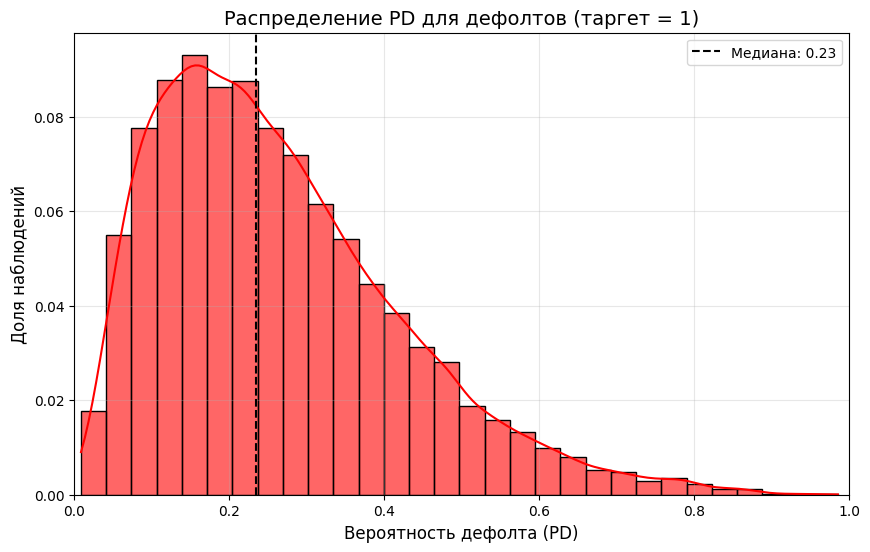

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Получаем предсказанные вероятности для всех наблюдений
y_pred_proba = catboost_clf_2.predict_proba(X_test)[:, 1]  # PD (вероятность дефолта)

# Фильтруем только те наблюдения, где реальный таргет = 1 (дефолт)
default_probs = y_pred_proba[y_test == 1]

# Основные статистики
print(f"Средняя PD для дефолтов: {default_probs.mean():.3f}")
print(f"Медиана PD для дефолтов: {np.median(default_probs):.3f}")

plt.figure(figsize=(10, 6))

# Гистограмма
sns.histplot(
    default_probs,
    bins=30,
    kde=True,
    color='red',
    alpha=0.6,
    stat='probability'  # Процент наблюдений в каждом бине
)

# Настройки графика
plt.title('Распределение PD для дефолтов (таргет = 1)', fontsize=14)
plt.xlabel('Вероятность дефолта (PD)', fontsize=12)
plt.ylabel('Доля наблюдений', fontsize=12)
plt.xlim(0, 1)
plt.grid(True, alpha=0.3)

# Вертикальная линия по медиане
plt.axvline(
    x=np.median(default_probs),
    color='black',
    linestyle='--',
    label=f'Медиана: {np.median(default_probs):.2f}'
)
plt.legend()

plt.show()

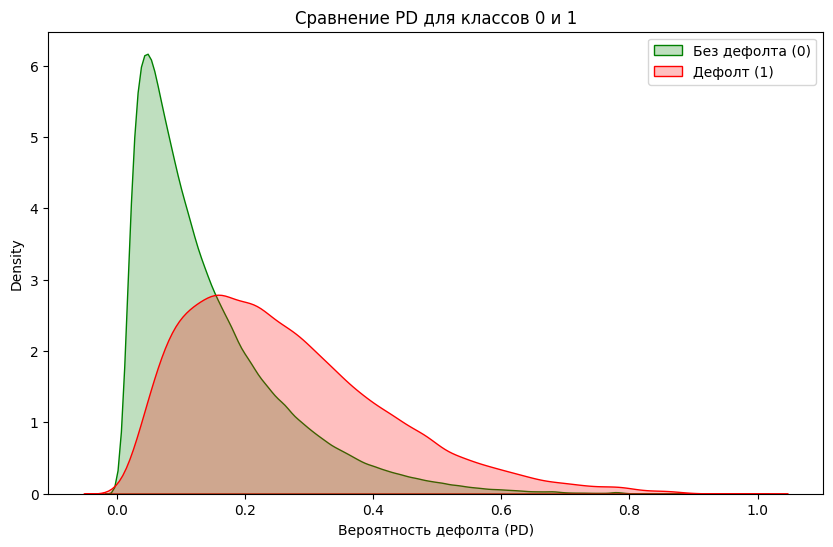

In [57]:
non_default_probs = y_pred_proba[y_test == 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(non_default_probs, label='Без дефолта (0)', color='green', fill=True)
sns.kdeplot(default_probs, label='Дефолт (1)', color='red', fill=True)
plt.title('Сравнение PD для классов 0 и 1')
plt.xlabel('Вероятность дефолта (PD)')
plt.legend()
plt.show()

In [49]:
y_test

1192450    0
2613413    1
628164     0
21938      0
2589147    0
          ..
1385990    0
2184487    1
62813      0
2446953    0
116249     0
Name: flag, Length: 750000, dtype: category
Categories (2, int64): [0, 1]

In [29]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(default_probs, non_default_probs)
print(f"p-value: {p_value:.3f}")  # Если <0.05 — распределения значимо различаются

p-value: 0.000


In [10]:
from sklearn.calibration import CalibratedClassifierCV

# Sigmoid-калибровка (Платтинг-скалинг)
calibrator = CalibratedClassifierCV(
    catboost_clf_2, 
    method='sigmoid', 
    cv=2,
)
calibrator.fit(X_train, y_train)
calibrated_probs = calibrator.predict_proba(X_test)[:, 1]


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 68.3ms	remaining: 1m 8s
1:	total: 135ms	remaining: 1m 7s
2:	total: 200ms	remaining: 1m 6s
3:	total: 264ms	remaining: 1m 5s
4:	total: 328ms	remaining: 1m 5s
5:	total: 391ms	remaining: 1m 4s
6:	total: 456ms	remaining: 1m 4s
7:	total: 518ms	remaining: 1m 4s
8:	total: 579ms	remaining: 1m 3s
9:	total: 639ms	remaining: 1m 3s
10:	total: 703ms	remaining: 1m 3s
11:	total: 764ms	remaining: 1m 2s
12:	total: 825ms	remaining: 1m 2s
13:	total: 885ms	remaining: 1m 2s
14:	total: 946ms	remaining: 1m 2s
15:	total: 1.01s	remaining: 1m 1s
16:	total: 1.07s	remaining: 1m 1s
17:	total: 1.13s	remaining: 1m 1s
18:	total: 1.19s	remaining: 1m 1s
19:	total: 1.25s	remaining: 1m 1s
20:	total: 1.32s	remaining: 1m 1s
21:	total: 1.38s	remaining: 1m 1s
22:	total: 1.44s	remaining: 1m 1s
23:	total: 1.5s	remaining: 1m 1s
24:	total: 1.57s	remaining: 1m 1s
25:	total: 1.63s	remaining: 1m 1s
26:	total: 1.69s	remaining: 1m 1s
27:	total: 1.75s	remaining: 1m
28:	total: 1.82s	remaining: 1m
29:	total: 1.88s	remaining: 1m

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 70.3ms	remaining: 1m 10s
1:	total: 135ms	remaining: 1m 7s
2:	total: 201ms	remaining: 1m 6s
3:	total: 265ms	remaining: 1m 6s
4:	total: 332ms	remaining: 1m 6s
5:	total: 397ms	remaining: 1m 5s
6:	total: 460ms	remaining: 1m 5s
7:	total: 522ms	remaining: 1m 4s
8:	total: 583ms	remaining: 1m 4s
9:	total: 645ms	remaining: 1m 3s
10:	total: 706ms	remaining: 1m 3s
11:	total: 769ms	remaining: 1m 3s
12:	total: 830ms	remaining: 1m 3s
13:	total: 891ms	remaining: 1m 2s
14:	total: 952ms	remaining: 1m 2s
15:	total: 1.01s	remaining: 1m 2s
16:	total: 1.08s	remaining: 1m 2s
17:	total: 1.14s	remaining: 1m 2s
18:	total: 1.21s	remaining: 1m 2s
19:	total: 1.27s	remaining: 1m 2s
20:	total: 1.33s	remaining: 1m 2s
21:	total: 1.4s	remaining: 1m 2s
22:	total: 1.46s	remaining: 1m 2s
23:	total: 1.53s	remaining: 1m 2s
24:	total: 1.59s	remaining: 1m 2s
25:	total: 1.67s	remaining: 1m 2s
26:	total: 1.74s	remaining: 1m 2s
27:	total: 1.8s	remaining: 1m 2s
28:	total: 1.87s	remaining: 1m 2s
29:	total: 1.94s	remaini

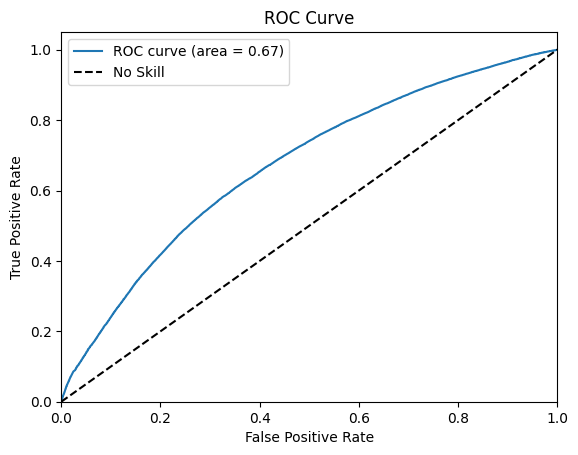

In [11]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, calibrated_probs) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

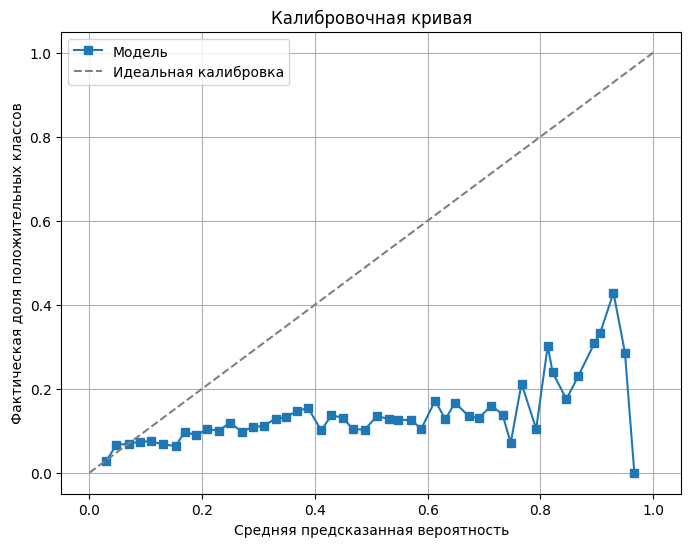

In [12]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Получаем калибровочные кривые
prob_true, prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=50)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Модель')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Идеальная калибровка')
plt.xlabel('Средняя предсказанная вероятность')
plt.ylabel('Фактическая доля положительных классов')
plt.title('Калибровочная кривая')
plt.legend()
plt.grid(True)
plt.show()

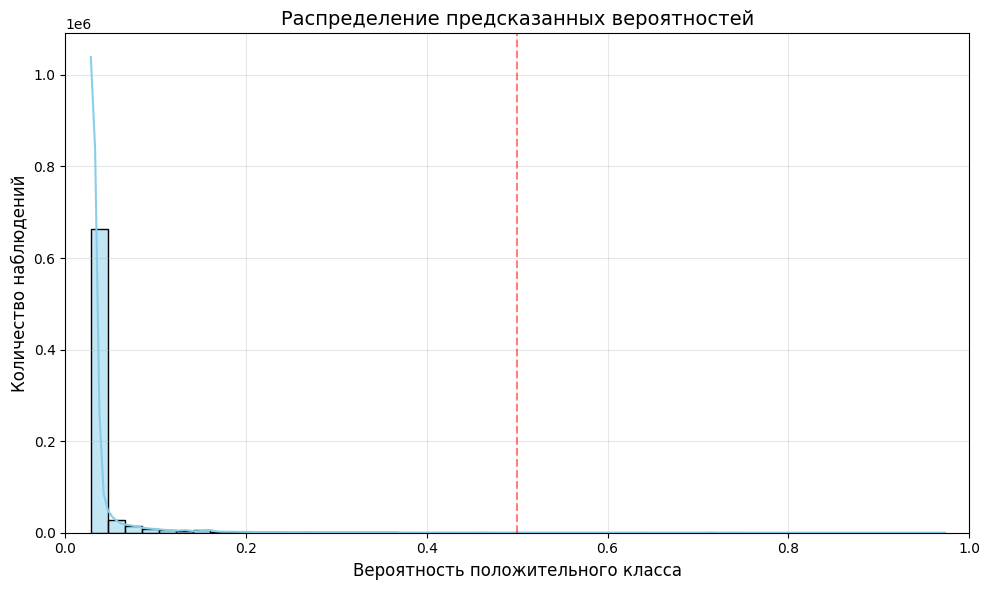

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Получаем вероятности для положительного класса
y_pred_proba = calibrator.predict_proba(X_test)[:, 1]

# Создаем график
plt.figure(figsize=(10, 6))

# Гистограмма распределения
sns.histplot(y_pred_proba, bins=50, kde=True, color='skyblue')

# Настройки графика
plt.title('Распределение предсказанных вероятностей', fontsize=14)
plt.xlabel('Вероятность положительного класса', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)
plt.xlim(0, 1)  # Ограничиваем диапазон от 0 до 1

# Добавляем вертикальную линию по порогу 0.5 (если нужно)
plt.axvline(0.5, color='red', linestyle='--', alpha=0.5)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [4]:
import joblib
catboost_clf_2.save_model('model.cbm', pool=X_train)
# joblib.dump(calibrator, 'modcalibrated_catboostel.joblib')


In [47]:
import optuna

def objective(trial):
    # предлагаем гиперпараметры
    iterations = trial.suggest_int('iterations', 100, 1000)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.03)
    depth = trial.suggest_int("depth", 1, 12)


    # создаём и обучаем модель
    clf = CatBoostClassifier(iterations=iterations,
                                    learning_rate=learning_rate,
                                    # depth=depth,
                                    task_type="GPU",
                                    early_stopping_rounds=20,
                                    )

    clf.fit(X_train, y_train,
                   eval_set=(X_test, y_test),
                   verbose=False,
    )

    # предсказываем и вычисляем roc_auc
    # preds = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    roc_auc =  roc_auc_score(y_test, y_pred_proba)   

    return roc_auc

In [48]:
# Запускаем оптимизацию
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)

# Выводим лучшие гиперпараметры
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-12-08 20:25:05,233] A new study created in memory with name: no-name-5c8ead11-4a83-4090-b6b6-945bf65b6314
[I 2024-12-08 20:25:16,304] Trial 0 finished with value: 0.7419867150544368 and parameters: {'iterations': 383, 'learning_rate': 0.02008975726101912, 'depth': 1}. Best is trial 0 with value: 0.7419867150544368.
[I 2024-12-08 20:25:20,626] Trial 1 finished with value: 0.737259246431513 and parameters: {'iterations': 128, 'learning_rate': 0.02278393577908915, 'depth': 11}. Best is trial 0 with value: 0.7419867150544368.
[I 2024-12-08 20:25:37,900] Trial 2 finished with value: 0.7388766749725877 and parameters: {'iterations': 646, 'learning_rate': 0.007202857958573411, 'depth': 9}. Best is trial 0 with value: 0.7419867150544368.
[I 2024-12-08 20:25:55,580] Trial 3 finished with value: 0.7427970657319891 and parameters: {'iterations': 677, 'learning_rate': 0.01674136946791916, 'depth': 8}. Best is trial 3 with value: 0.7427970657319891.
[I 2024-12-08 20:26:01,275] Trial 4 finis

KeyboardInterrupt: 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_clf = RandomForestClassifier(n_estimators=50, 
                             random_state=11,
                             n_jobs=-1, 
                             verbose = 2)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50
building tree 3 of 50

building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50building tree 12 of 50

building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min


building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.3min finished


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=11, verbose=2)

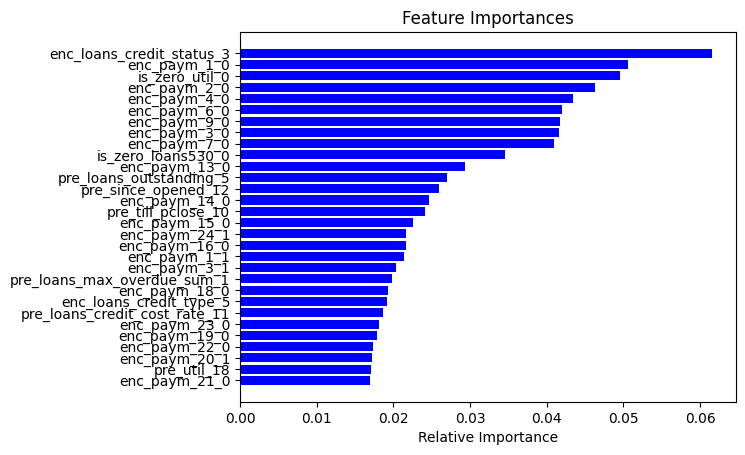

In [56]:
feature_names = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

threshold = 0.8

y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Model accuracy score : {0:0.4f}'. format(accuracy))
print('Model ROC AUC score : {0:0.4f}'. format(roc_auc))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    4.4s finished


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    723414
           1       0.09      0.00      0.00     26586

    accuracy                           0.96    750000
   macro avg       0.53      0.50      0.49    750000
weighted avg       0.93      0.96      0.95    750000

Model accuracy score : 0.9645
Model ROC AUC score : 0.6840


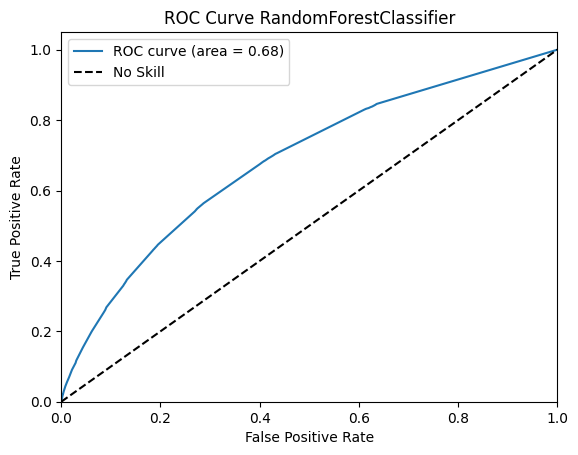

In [59]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RandomForestClassifier')
plt.legend()
plt.show()

In [5]:
from catboost import CatBoostClassifier, Pool

catboost_clf = CatBoostClassifier(iterations=100,
                                    learning_rate=0.1,
                                    task_type="GPU"
                                    )
train_pool = Pool(X_train, 
                  y_train)

result = catboost_clf.select_features(
    train_pool,
    features_for_select=X_train.columns.tolist(),
    num_features_to_select=40
)

Step #1 out of 1
0:	learn: 0.5497882	total: 42.4ms	remaining: 4.2s
1:	learn: 0.4448494	total: 58.9ms	remaining: 2.89s
2:	learn: 0.3669496	total: 78.5ms	remaining: 2.54s
3:	learn: 0.3117951	total: 97ms	remaining: 2.33s
4:	learn: 0.2708580	total: 117ms	remaining: 2.21s
5:	learn: 0.2407058	total: 134ms	remaining: 2.1s
6:	learn: 0.2182095	total: 153ms	remaining: 2.04s
7:	learn: 0.2013904	total: 170ms	remaining: 1.95s
8:	learn: 0.1885791	total: 191ms	remaining: 1.93s
9:	learn: 0.1786464	total: 208ms	remaining: 1.87s
10:	learn: 0.1711665	total: 225ms	remaining: 1.82s
11:	learn: 0.1653374	total: 242ms	remaining: 1.77s
12:	learn: 0.1607459	total: 259ms	remaining: 1.74s
13:	learn: 0.1572482	total: 277ms	remaining: 1.7s
14:	learn: 0.1546300	total: 294ms	remaining: 1.66s
15:	learn: 0.1524589	total: 309ms	remaining: 1.62s
16:	learn: 0.1505454	total: 327ms	remaining: 1.6s
17:	learn: 0.1490611	total: 348ms	remaining: 1.58s
18:	learn: 0.1479972	total: 363ms	remaining: 1.55s
19:	learn: 0.1468912	total

In [11]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier(iterations=2000,
                                    learning_rate=0.02,
                                    task_type="GPU"
                                    )

catboost_clf.fit(X_train, y_train)




0:	learn: 0.6619238	total: 51.8ms	remaining: 1m 43s
1:	learn: 0.6322479	total: 106ms	remaining: 1m 46s
2:	learn: 0.6041557	total: 161ms	remaining: 1m 46s
3:	learn: 0.5782048	total: 204ms	remaining: 1m 41s
4:	learn: 0.5532622	total: 253ms	remaining: 1m 41s
5:	learn: 0.5299416	total: 300ms	remaining: 1m 39s
6:	learn: 0.5086162	total: 342ms	remaining: 1m 37s
7:	learn: 0.4877692	total: 398ms	remaining: 1m 39s
8:	learn: 0.4682928	total: 454ms	remaining: 1m 40s
9:	learn: 0.4501917	total: 515ms	remaining: 1m 42s
10:	learn: 0.4326929	total: 576ms	remaining: 1m 44s
11:	learn: 0.4164748	total: 627ms	remaining: 1m 43s
12:	learn: 0.4013501	total: 676ms	remaining: 1m 43s
13:	learn: 0.3870406	total: 729ms	remaining: 1m 43s
14:	learn: 0.3737914	total: 777ms	remaining: 1m 42s
15:	learn: 0.3610766	total: 826ms	remaining: 1m 42s
16:	learn: 0.3490941	total: 883ms	remaining: 1m 43s
17:	learn: 0.3379143	total: 965ms	remaining: 1m 46s
18:	learn: 0.3277523	total: 1s	remaining: 1m 44s
19:	learn: 0.3178176	tot

{'recall': 0.00105318588730911, 'precision': 0.6511627906976745, 'f1': 0.0021029704457546285, 'roc_auc': 0.7581488484695165}


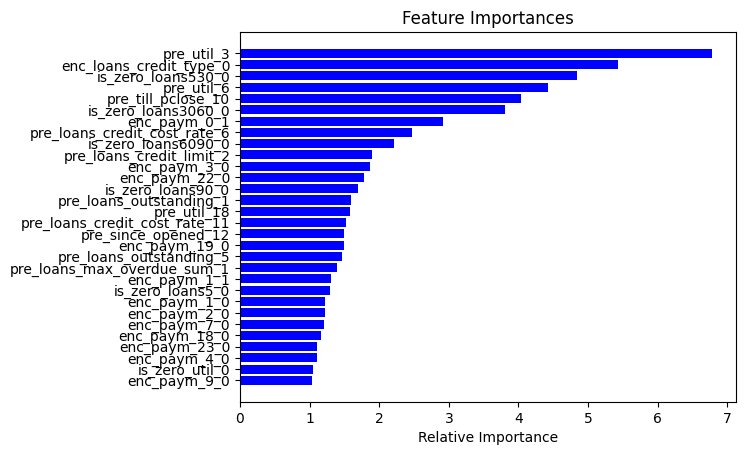

In [12]:
# Get predicted classes
y_pred = catboost_clf.predict(X_test)
# Get predicted probabilities for each class
y_pred_proba = catboost_clf.predict_proba(X_test)[:,1]

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
print(metrics)

feature_names = X_train.columns
importances = catboost_clf.feature_importances_
indices = np.argsort(importances)[-30:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector 
from catboost import CatBoostClassifier

sfs = SequentialFeatureSelector(CatBoostClassifier(iterations=100,
                                    learning_rate=0.1,
                                    task_type="GPU",
                                    logging_level='Silent'
                                    ), 
                                k_features="best",
                                # k_features=6,
                                forward=True,
                                # forward=False,
                                floating=False, # True to drop selected features
                                scoring='roc_auc',
                                cv=2,
                                verbose=2,
                                n_jobs = 1
                                )

sfs.fit(X_train,y_train)

with open("rfe_sfs_cols.txt", "w") as output:
    output.write(str(sfs.k_feature_names_))
with open("rfe_sfs_idx.txt", "w") as output:
    output.write(str(sfs.k_feature_idx_))


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

Best accuracy score: 0.63
Best subset (indices): [0, 9, 11, 13, 19, 20, 22, 23, 28, 33, 37, 39]
Best subset (corresponding names): ['enc_paym_7_3', 'enc_paym_6_3', 'pre_since_confirmed_2', 'is_zero_loans530_0', 'pre_since_confirmed_10', 'is_zero_util_0', 'pre_loans_credit_cost_rate_4', 'is_zero_loans530_1', 'pre_till_pclose_1', 'pre_since_confirmed_6', 'pre_till_fclose_11', 'enc_paym_5_0']


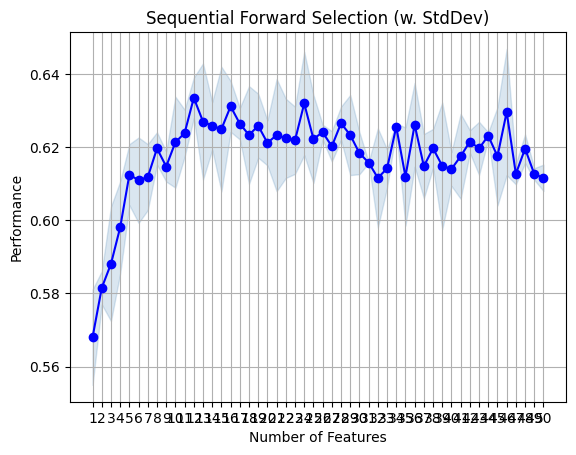

In [44]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

rfe_sfs_idx = list(sfs.k_feature_idx_)
rfe_sfs_col = list(sfs.k_feature_names_)

print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', rfe_sfs_idx)
print('Best subset (corresponding names):', rfe_sfs_col)


fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

In [ ]:
class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        return X[:,self.cols]
    
    def fit(self, X, y=None):
        return self

In [ ]:
from sklearn.preprocessing import QuantileTransformer, SplineTransformer, PolynomialFeatures, MinMaxScaler, KBinsDiscretizer

pf = PolynomialFeatures(degree=2)
qt = QuantileTransformer()
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
s_scaler = StandardScaler()
t_encoder = TargetEncoder()
classifier = RandomForestClassifier(n_estimators=100, max_depth=100)

In [ ]:
num_features = list(df.select_dtypes(include=['number']).columns)
num_features

In [ ]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
    ],
    remainder='drop') # Удаляем столбцы, которые не затронуты преобразования

In [ ]:
rfe_sfs_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', classifier)
])

rfe_sfs_pipeline.fit(X_train, y_train)

y_pred_proba = rfe_sfs_pipeline.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   
metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics

In [ ]:
X_train_fe_sklearn = X_train.copy()
Y_train_fe_sklearn = y_train.copy()

In [ ]:
preprocessor_sklearn = ColumnTransformer(
    transformers=[
        ('num', s_scaler, num_features),  # преобразования для числовых признаков
        ('poly', Pipeline(steps=[
                                    ('poly', pf),
                                    ('scale', StandardScaler())
                                ]), num_features
            ), # В преобразования добавляем созданный ранее pipeline
        ('kbins', kb, num_features),
    ],
    remainder='drop') # Удаляем столбцы, которые не затронуты преобразования

In [ ]:
X_train_fe_sklearn_raw = preprocessor_sklearn.fit_transform(X_train_fe_sklearn, Y_train_fe_sklearn)
X_train_fe_sklearn = pd.DataFrame(X_train_fe_sklearn_raw, columns=preprocessor_sklearn.get_feature_names_out())

In [ ]:
X_train_fe_sklearn.columns

Index(['num__pre_pterm_4', 'num__pre_loans_credit_cost_rate_5',
       'num__is_zero_maxover2limit_1', 'num__enc_loans_credit_status_2',
       'num__enc_paym_9_0', 'num__pre_util_3',
       'num__enc_loans_credit_status_3', 'num__pre_till_pclose_1',
       'num__pre_fterm_8', 'num__fclose_flag_1',
       ...
       'kbins__enc_paym_6_0', 'kbins__pre_util_16',
       'kbins__enc_loans_credit_type_3', 'kbins__pre_loans_next_pay_summ_2',
       'kbins__fclose_flag_0', 'kbins__enc_paym_3_0', 'kbins__is_zero_util_1',
       'kbins__is_zero_loans530_1', 'kbins__enc_loans_credit_type_4',
       'kbins__enc_paym_2_0'],
      dtype='object', length=556)

In [ ]:
pipeline_sklearn = Pipeline(steps=[('preprocessor', preprocessor_sklearn), 
                           ('model', classifier)])

pipeline_sklearn.fit(X_train, y_train)

y_pred_proba = pipeline_sklearn.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   

metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics

/home/yuriy/ProgrammingProjects/DecSystem/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'recall': np.float64(0.0),
 'precision': np.float64(0.0),
 'f1': np.float64(0.0),
 'roc_auc': np.float64(0.6549707328888144)}

In [ ]:
import optuna

def objective(trial):
    # предлагаем гиперпараметры
    n_estimators = trial.suggest_int('n_estimators', 1, 200)
    max_depth = trial.suggest_int('max_depth', 1, 200)
    max_features = trial.suggest_float('max_features', 0.1, 1)

    # создаём и обучаем модель
    opt_pipeline  = Pipeline(steps=[
        ('preprocessor', preprocessor_sklearn), 
        ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
        ('model', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features))
    ])

    opt_pipeline.fit(X_train, y_train)

    # предсказываем и вычисляем ROC_AUC
    y_pred_proba = opt_pipeline.predict_proba(X_test)[:,1]
    roc_auc =  roc_auc_score(y_test, y_pred_proba)

    return roc_auc

In [ ]:
# Запускаем оптимизацию
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=60)
best_params = study.best_trial.params
# Выводим лучшие гиперпараметры
print('Number of finished trials:', len(study.trials))
print('Best trial:', best_params)

In [ ]:
opt_pipeline  = Pipeline(steps=[
    ('preprocessor', preprocessor_sklearn), 
    ('rfe_extractor', ColumnExtractor(rfe_sfs_idx)),
    ('model', RandomForestClassifier(**best_params))
])

opt_pipeline.fit(X_train, y_train)

In [ ]:
y_pred_proba = opt_pipeline.predict_proba(X_test)[:,1]
y_pred = (y_pred_proba >= threshold).astype('int')

metrics = {}
metrics["recall"] = recall_score(y_test, y_pred)   
metrics["precision"] = precision_score(y_test, y_pred)
metrics["f1"] = f1_score(y_test, y_pred)
metrics["roc_auc"] = roc_auc_score(y_test, y_pred_proba)
metrics